In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

obesity_data = pd.read_csv("ObesityDataSet.csv")
obesity_data.head(10)

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,40200,NaN,PITTSBURGH,Pittsburgh,West oakland,0.366391
5,Pennsylvania,42003040400,40400,NaN,PITTSBURGH,Pittsburgh,North oakland,0.155867
6,Pennsylvania,42003040500,40500,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.112780
7,Pennsylvania,42003040600,40600,NaN,PITTSBURGH,Pittsburgh,Central Oakland,0.144556
8,Pennsylvania,42003040900,40900,NaN,PITTSBURGH,Pittsburgh,South Oakland,0.281331
9,Pennsylvania,42003050100,50100,NaN,PITTSBURGH,Pittsburgh,Middle Hill,0.608099


First, I imported the dataset regarding obesity in Pittsburgh. The essence of my metric is that the neighborhood with the least amount of obesity would be the best place to live. No, this is not a fatphobic concept, I am simply choosing which neighborhood appears to be the healthiest by their obesity rates.

In [3]:
obesity_data_condensed = obesity_data.drop(labels=['2000 Tract', '2010 Tract', 'MUNICIPALITY'], axis = 1)
obesity_data_condensed.head(10)

,stname,tractfips,Municipality,City Neighborhood,2006-2010 estimate of obesity
0,Pennsylvania,42003010300,Pittsburgh,Bluff,0.246936
1,Pennsylvania,42003020100,Pittsburgh,Central Business District,0.668012
2,Pennsylvania,42003020300,Pittsburgh,Strip District,0.369996
3,Pennsylvania,42003030500,Pittsburgh,Crawford Roberts,0.488691
4,Pennsylvania,42003040200,Pittsburgh,West oakland,0.366391
5,Pennsylvania,42003040400,Pittsburgh,North oakland,0.155867
6,Pennsylvania,42003040500,Pittsburgh,Central Oakland,0.112780
7,Pennsylvania,42003040600,Pittsburgh,Central Oakland,0.144556
8,Pennsylvania,42003040900,Pittsburgh,South Oakland,0.281331
9,Pennsylvania,42003050100,Pittsburgh,Middle Hill,0.608099


I then trimmed the data by removing uneccesary columns. The columns removed would not have had any effect on the health level, they were just identifiers for the neighborhood in which the data was collected.

In [4]:
obesity_values = obesity_data_condensed.sort_values('2006-2010 estimate of obesity', ascending = True)
obesity_values.head(10)

,stname,tractfips,Municipality,City Neighborhood,2006-2010 estimate of obesity
369,Pennsylvania,42003562000,Pittsburgh,North Oakland,0.070353
48,Pennsylvania,42003140100,Pittsburgh,Squirrel Hill North,0.080288
6,Pennsylvania,42003040500,Pittsburgh,Central Oakland,0.112780
18,Pennsylvania,42003070600,Pittsburgh,Shadyside,0.118533
413,Pennsylvania,42003981200,Pittsburgh,North Shore,0.121487
20,Pennsylvania,42003070900,Pittsburgh,Shadyside,0.126705
391,Pennsylvania,42003563800,Ben Avon Heights,NaN,0.127446
16,Pennsylvania,42003070300,Pittsburgh,Shadyside,0.128451
17,Pennsylvania,42003070500,Pittsburgh,Shadyside,0.130383
19,Pennsylvania,42003070800,Pittsburgh,Shadyside,0.134520


In [5]:
query_mask = obesity_values['2006-2010 estimate of obesity'] <= 0.165
condensed_values = obesity_values[query_mask]
condensed_values.head(25)

,stname,tractfips,Municipality,City Neighborhood,2006-2010 estimate of obesity
369,Pennsylvania,42003562000,Pittsburgh,North Oakland,0.070353
48,Pennsylvania,42003140100,Pittsburgh,Squirrel Hill North,0.080288
6,Pennsylvania,42003040500,Pittsburgh,Central Oakland,0.112780
18,Pennsylvania,42003070600,Pittsburgh,Shadyside,0.118533
413,Pennsylvania,42003981200,Pittsburgh,North Shore,0.121487
20,Pennsylvania,42003070900,Pittsburgh,Shadyside,0.126705
391,Pennsylvania,42003563800,Ben Avon Heights,NaN,0.127446
16,Pennsylvania,42003070300,Pittsburgh,Shadyside,0.128451
17,Pennsylvania,42003070500,Pittsburgh,Shadyside,0.130383
19,Pennsylvania,42003070800,Pittsburgh,Shadyside,0.134520


The rates of obesity were then put in order. The table was put in ascending order meaning the value at the top was the neighborhood with the lowest rate of obesity.

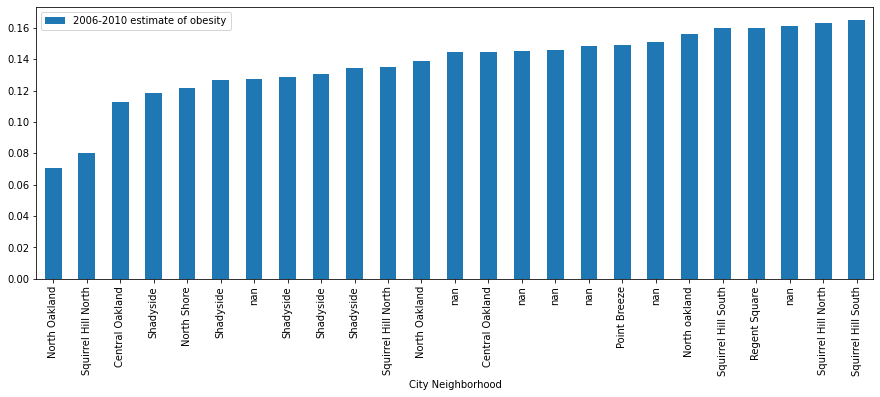

In [184]:
condensed_values.plot(x='City Neighborhood', y='2006-2010 estimate of obesity', kind='bar', figsize=(15,5))

This graph shows the neighborhoods with the lowest estimate of obesity

In [8]:
query_mask = obesity_values['2006-2010 estimate of obesity'] >= 0.65
high_obesity = obesity_values[query_mask]
high_obesity.head(10)

,stname,tractfips,Municipality,City Neighborhood,2006-2010 estimate of obesity
46,Pennsylvania,42003130400,Pittsburgh,Homewood South,0.660585
1,Pennsylvania,42003020100,Pittsburgh,Central Business District,0.668012
366,Pennsylvania,42003561700,Pittsburgh,Saint Clair,0.699500
84,Pennsylvania,42003250700,Pittsburgh,California Kirkbride,0.771046
13,Pennsylvania,42003051100,Pittsburgh,Terrace Village,0.793133
385,Pennsylvania,42003563000,Pittsburgh,Fairywood,0.820311
88,Pennsylvania,42003260900,Pittsburgh,Northview Heights,0.922932


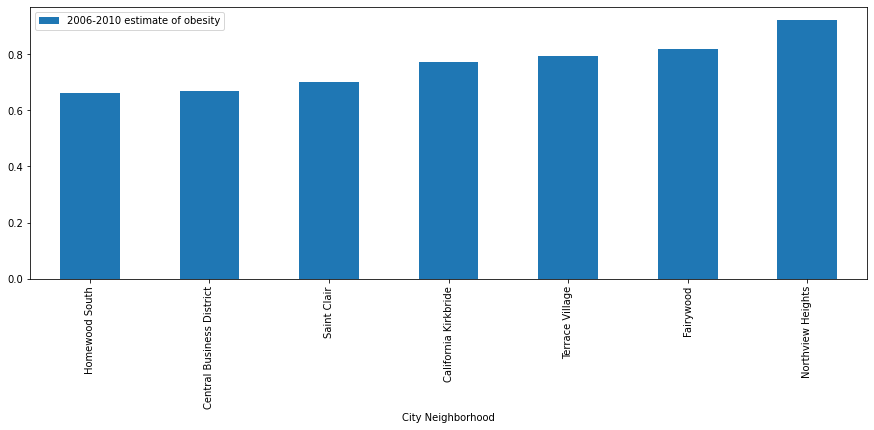

In [9]:
high_obesity.plot(x='City Neighborhood', y='2006-2010 estimate of obesity', kind='bar', figsize=(15,5))

This graph shows the neighborhoods with the highest estimate of obesity

POINT ALLOCATION:
    
    5 points for the neighborhoods with the lowest estimate of obesity
    4 points for the neighborhoods in the 25th percentile
    3 points for the neighborhoods around the median
    2 points for the neighborhoods in the 75th percentile
    1 point for 5th
    
5 points:
1. North Oakland 
2. Squirrel Hill North
3. Central Oakland 
4. Shadyside 
5. North Shore

4 points:
1. Squirrel Hill South
2. Regent Square
3. Point Breeze

3 points:
1. Garfield
2. Upper Hill
3. Arlington Heights
4. Larimer

2 points:
1. Saint Clair
2. Central Business District
3. Homewood South

1 point:
1. Northview Heights
2. Fairywood
3. Terrace Village
4. California Kirkbride